In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [2]:
df.shape

(10866, 21)

In [3]:
df.drop_duplicates(inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

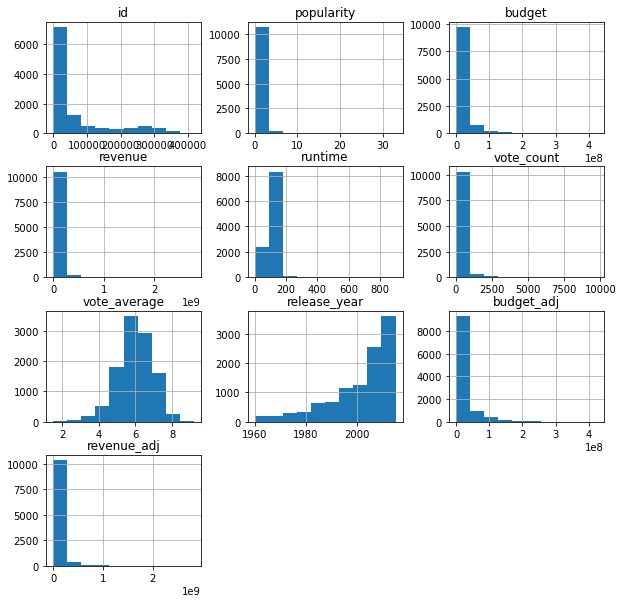

In [5]:
df.hist(figsize = [10,10])

In [6]:
df.drop(['id', 'imdb_id', 'popularity', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'production_companies', 'release_date', 'vote_count'], axis = 1, inplace = True)

In [7]:
df.dropna(axis = 0 , inplace = True,subset = ['genres'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        10842 non-null  int64  
 1   revenue       10842 non-null  int64  
 2   genres        10842 non-null  object 
 3   vote_average  10842 non-null  float64
 4   release_year  10842 non-null  int64  
 5   budget_adj    10842 non-null  float64
 6   revenue_adj   10842 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 677.6+ KB


In [9]:
list_genres = []
total_genre = []
genre_count = {}
i = 0
for i in range(len(df)):
    row = df.genres.iloc[i]
    string = row.split("|")[0]
    total_genre.append(string)
    
    if string not in list_genres:
        list_genres.append(string)
        
for i in range(len(list_genres)):
    num = df.genres.str.contains(list_genres[i]).sum()
    genre_count[list_genres[i]] = num
    
genre_count_list = sorted(genre_count.items(), key=lambda x:x[1], reverse=True)
sortdict = dict(genre_count_list)

Text(0, 0.5, 'Number of Movies')

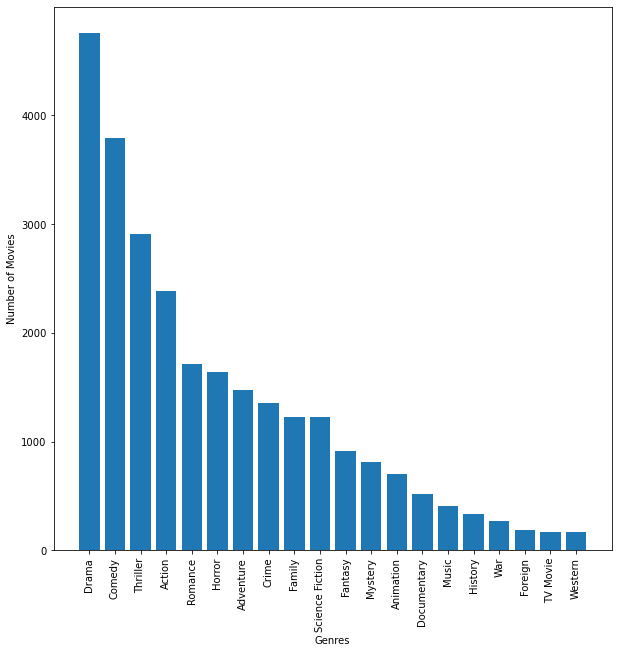

In [10]:

genre = list(sortdict.keys())
movies = list(sortdict.values())

plt.figure(figsize=(10, 10))

graph = plt.bar(genre,movies)
plt.xticks(rotation = 'vertical')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')


([<matplotlib.patches.Wedge at 0x2549b386100>,
 [Text(0.9350204431981545, 0.579427968604836, 'Drama'),
  Text(0.02108842057784385, 1.0997978352940745, 'Comedy'),
  Text(-0.7591754013792853, 0.7960230586739313, 'Thriller'),
  Text(-1.0796980441405255, 0.21036191071371246, 'Action'),
  Text(-1.0556390990898492, -0.30923468834005596, 'Romance'),
  Text(-0.8585797033327695, -0.6876342727242539, 'Horror'),
  Text(-0.5591895439015697, -0.9472629275925215, 'Adventure'),
  Text(-0.22286837306285437, -1.0771860044989057, 'Crime'),
  Text(0.10681796030993816, -1.0948013168402861, 'Family'),
  Text(0.4120671697341308, -1.0199022735670822, 'Science Fiction'),
  Text(0.6515837514888178, -0.886249747416471, 'Fantasy'),
  Text(0.8155262676640743, -0.7381848730161737, 'Mystery'),
  Text(0.9321047766988548, -0.5841067413197507, 'Animation'),
  Text(1.005420742056119, -0.446238872626896, 'Documentary'),
  Text(1.047715938005756, -0.3350989603814359, 'Music'),
  Text(1.0727437455398408, -0.24335335708626

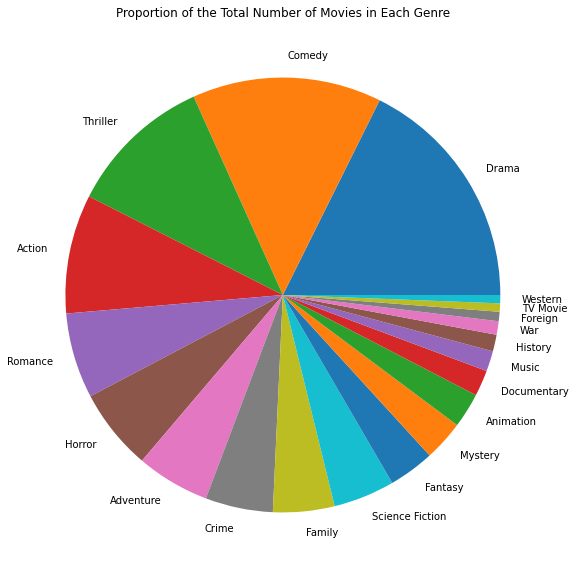

In [11]:
genre = list(sortdict.keys())
movies = list(sortdict.values())

plt.figure(figsize = (10, 10))
plt.title('Proportion of the Total Number of Movies in Each Genre')
plt.pie(movies, labels = genre, textprops = {'fontsize': 10})


In [12]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv'
df = pd.read_csv(url,index_col = 'id')
df.drop_duplicates(inplace = True)
genres_df = df['genres'].str.split('|',expand = True)
genres_df = genres_df.stack()
genres_df = pd.DataFrame(genres_df)
genres_df.rename(columns={0:'genres_adj'},inplace = True)


In [13]:
df_merged = df.merge(genres_df,left_index=True, right_index=True)

In [17]:
genres_df.genres_adj.value_counts()

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres_adj, dtype: int64

In [19]:
df_merged.drop('genres', axis=1, inplace=True)

KeyError: "['genres'] not found in axis"

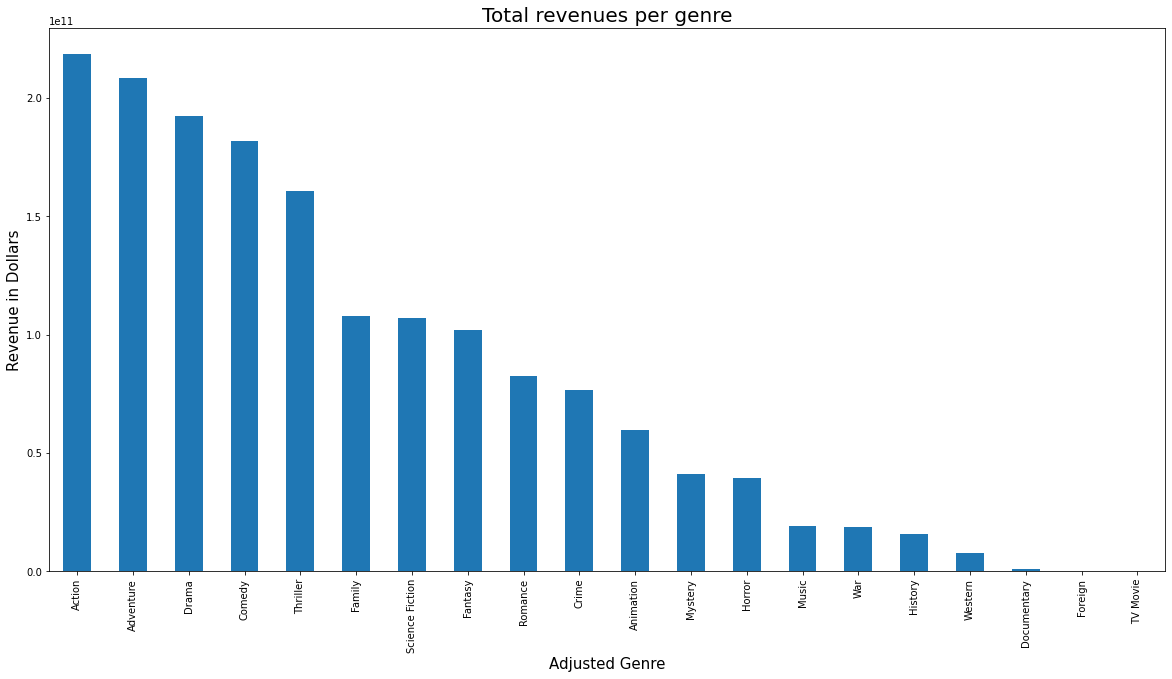

In [20]:
df_merged.groupby('genres_adj').revenue_adj.sum().sort_values(ascending=False).plot.bar( figsize=(20,10), fontsize= 10)
plt.ylabel('Revenue in Dollars', fontsize= 15)
plt.xlabel('Adjusted Genre', fontsize= 15)
plt.title('Total revenues per genre', fontsize=20);

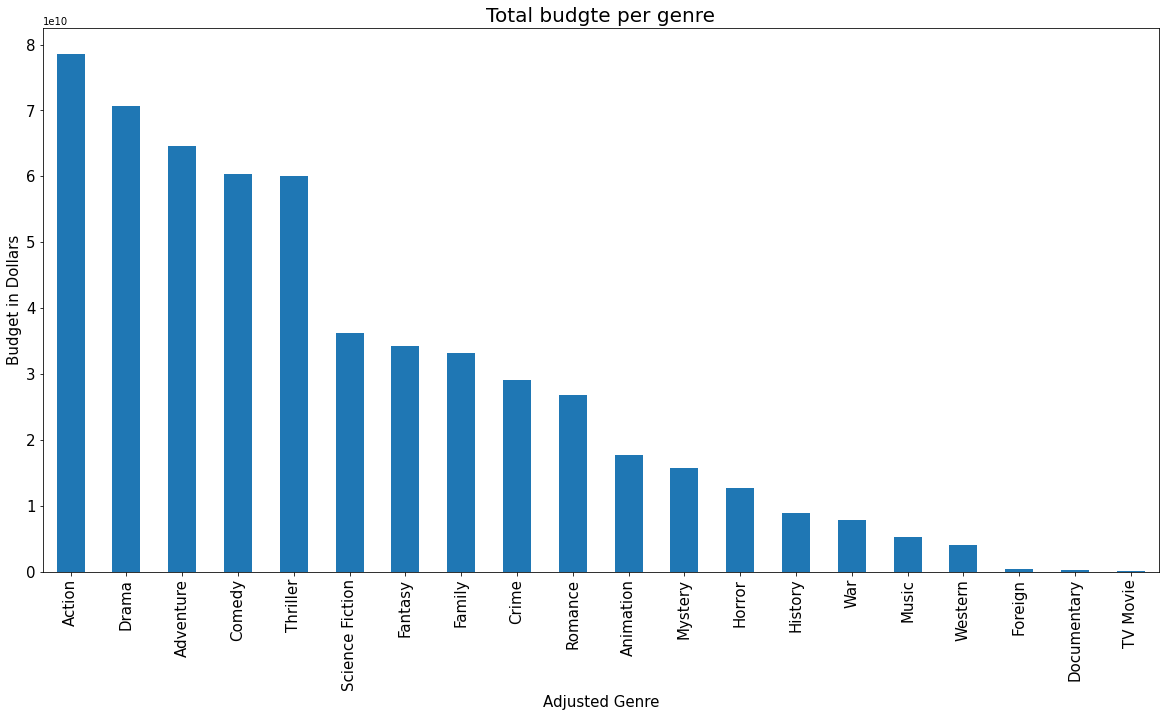

In [523]:
df_merged.groupby('genres_adj').budget_adj.sum().sort_values(ascending=False).plot.bar( figsize=(20,10), fontsize= 15)
plt.ylabel('Budget in Dollars', fontsize= 15)
plt.xlabel('Adjusted Genre', fontsize= 15)
plt.title('Total budgte per genre', fontsize=20);

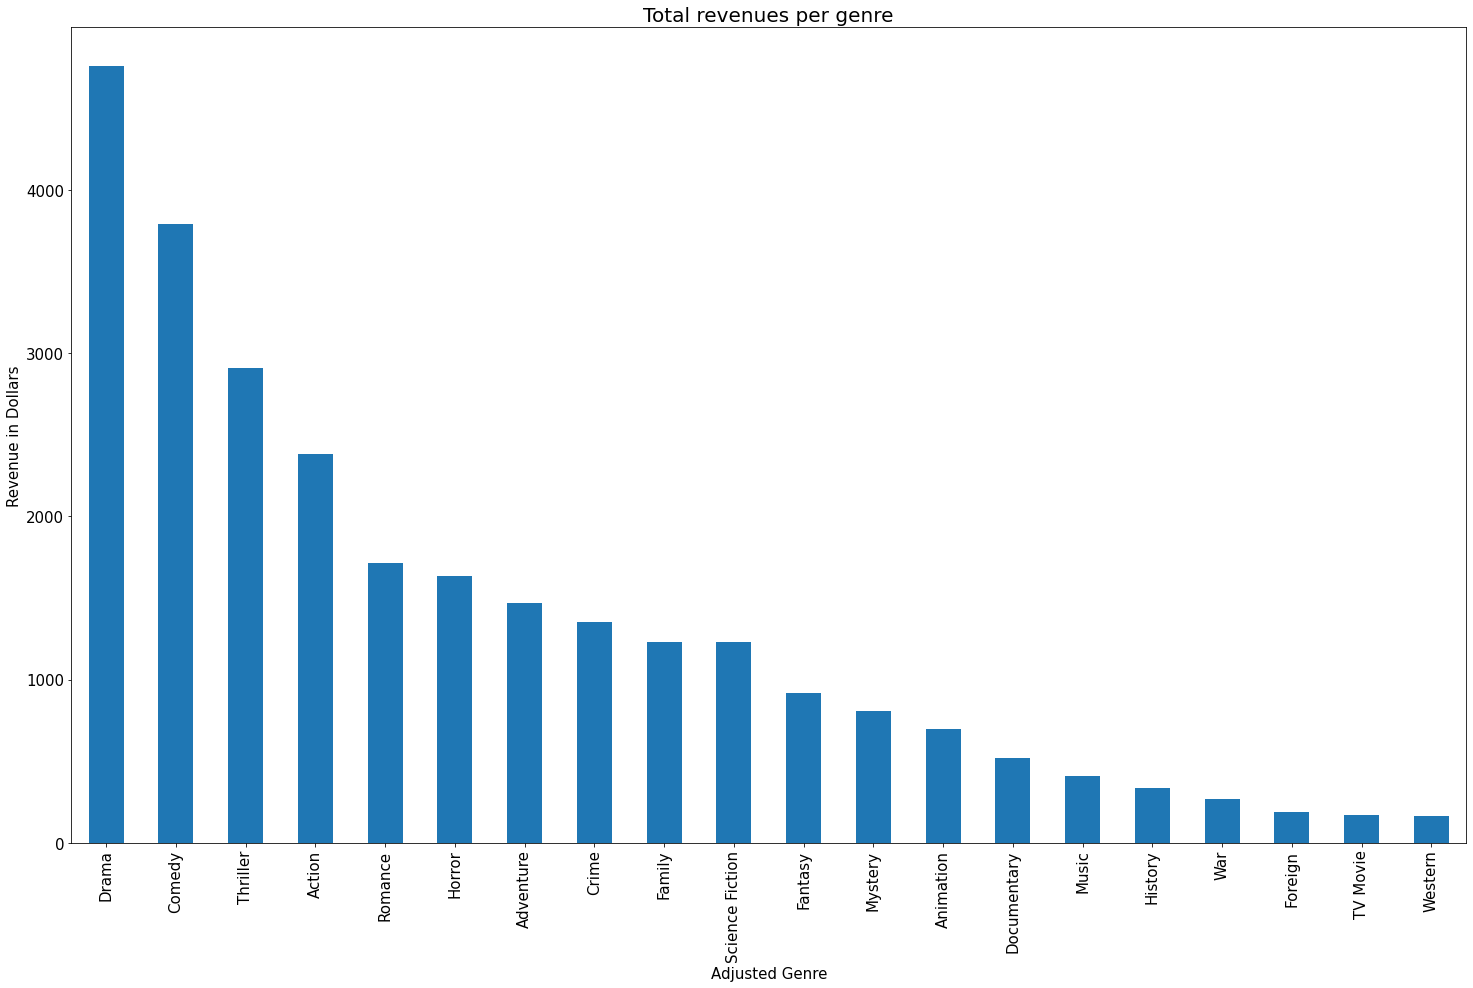

In [489]:
genres_df.genres_adj.value_counts().plot.bar( figsize=(25,15), fontsize= 15)
plt.ylabel('Number of movies', fontsize= 15)
plt.xlabel('Adjusted Genre', fontsize= 15)
plt.title('Total number of movies per genre', fontsize=20);

In [535]:
df_merged.dropna(axis = 0 , inplace = True,subset = ['budget_adj'])
df_merged.dropna(axis = 0 , inplace = True,subset = ['revenue_adj'])
df_merged['profit'] = df_merged['revenue_adj']-df_merged['budget_adj']
df_merged['profit'].isnull().sum()

0

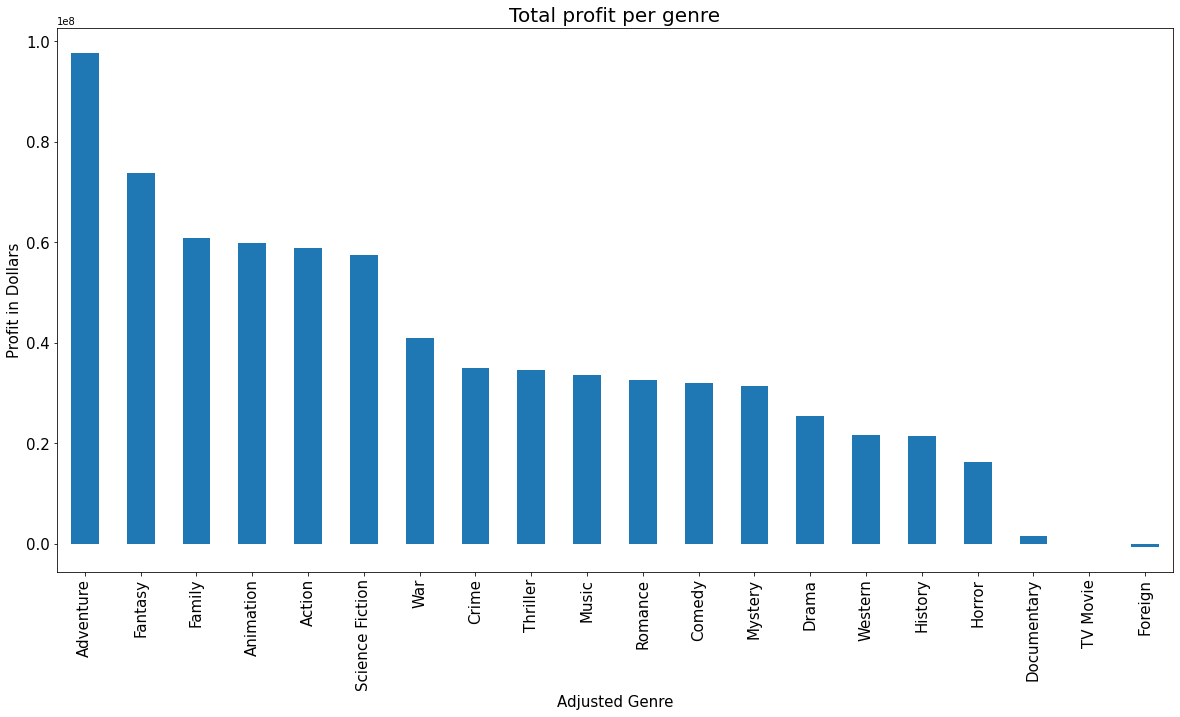

In [526]:
df_merged.groupby('genres_adj').profit.mean().sort_values(ascending=False).plot.bar( figsize=(20,10), fontsize= 15)
plt.ylabel('Profit in Dollars', fontsize= 15)
plt.xlabel('Adjusted Genre', fontsize= 15)
plt.title('Total profit per genre', fontsize=20);

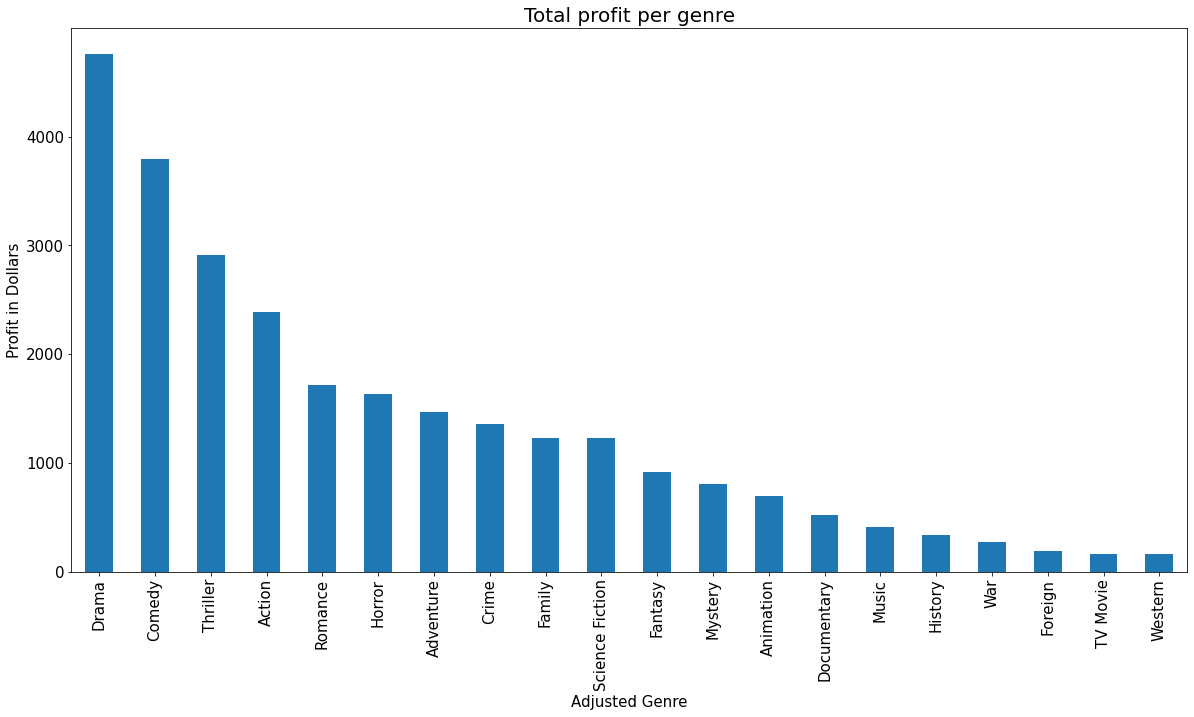

In [518]:
df_merged.groupby('genres_adj').release_year.count().sort_values(ascending=False).plot.bar( figsize=(20,10), fontsize= 15)
plt.ylabel('Profit in Dollars', fontsize= 15)
plt.xlabel('Adjusted Genre', fontsize= 15)
plt.title('Total profit per genre', fontsize=20);


In [507]:
a = df_merged.groupby('genres_adj').revenue_adj.sum()
b = df_merged.groupby('genres_adj').budget_adj.sum()
b.head(10)

genres_adj
Action         7.857690e+10
Adventure      6.463182e+10
Animation      1.768145e+10
Comedy         6.038575e+10
Crime          2.915638e+10
Documentary    3.240758e+08
Drama          7.070282e+10
Family         3.314331e+10
Fantasy        3.428525e+10
Foreign        4.472804e+08
Name: budget_adj, dtype: float64

In [514]:
df_merged.head(1)

,,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_adj
id,,,,,,,,,,,,,,,,,,,,,
135397,0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action


In [528]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [527]:
df.head()

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
